<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import tree
import plotly.express as px


In [2]:
df=pd.read_csv(r'C:\Users\kisaz\Downloads\housing.csv')

In [9]:
def welcome (df):
    '''Функция получения первичной информации о датафрейме'''
    print ('------------- Первые 5 строк ------------')
    display(df.head())
    print('')
    print('')
    print ('------------- Типы данных ------------')
    print (df.info())
    print('')
    print('')
    print ('------------- Пропуски ------------')
    count = 0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count = +1
        if count == 0:
            print('Пропусков НЕТ')
    print('')
    print('')
    display(pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient('coolwarm'))


In [10]:
welcome(df)

------------- Первые 5 строк ------------


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2




------------- Типы данных ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


------------- Пропуски ------------
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропуск

,0
CRIM,0.000000
ZN,0.000000
INDUS,0.000000
CHAS,0.000000
NOX,0.000000
RM,0.000000
AGE,0.000000
DIS,0.000000
RAD,0.000000
TAX,0.000000


In [11]:
x = df.drop('MEDV',axis=1)
y = df['MEDV']

In [18]:
df.shape

(506, 14)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.22, random_state=231)

In [54]:
print('Обучающая часть-', X_train.shape)

Обучающая часть- (394, 13)


In [55]:
print('Для тестирования-', X_test.shape)

Для тестирования- (112, 13)


In [56]:
regres = LinearRegression()

In [57]:
regres.fit(X_train,y_train)

LinearRegression()

In [58]:
pred = regres.predict(X_test)

In [59]:
pred

array([29.14075626, 24.75935744, 22.48704074, 18.23626496, 33.58069899,
       32.89890648, 24.72302069, 25.16420262, 12.19517291, 25.34639049,
       16.89409286, 25.0072092 , 37.5764477 , 24.82980984, 21.39059101,
       20.35313972, 11.35701895, 19.11698051, 30.84622752, 20.60027818,
       22.71256246, 26.97124481, 33.67123796, 22.64610391, 34.05730085,
       20.90709474, 21.90106788, 16.26248605, 24.11121298, 37.19881076,
       14.85519268, 13.69680332, 31.18367655, 19.05705394, 27.55576008,
       15.1297587 , 36.16221058, 18.50095098, 14.22752822, 27.00212445,
       19.51905572, 20.57650206, 25.93297794, 26.5722849 , 16.01824359,
       28.76448981, 13.61942309, 28.57420946, 29.92656866, 23.90943304,
       24.36233289, 32.30904133, 22.43758571, 27.15646312, 19.36833587,
       38.51275471, 13.81224357, 23.81519431, 16.91745643, 24.30587107,
       31.4250885 , 31.25875543, 13.76538353, 26.09619128, 24.31005566,
       -0.35710351, 22.60333582, 16.03148446, 29.77988296, 16.39

In [60]:
y_test

298    22.5
294    21.7
505    11.9
469    20.1
220    26.7
       ... 
154    17.0
137    17.1
72     22.8
470    19.9
397     8.5
Name: MEDV, Length: 112, dtype: float64

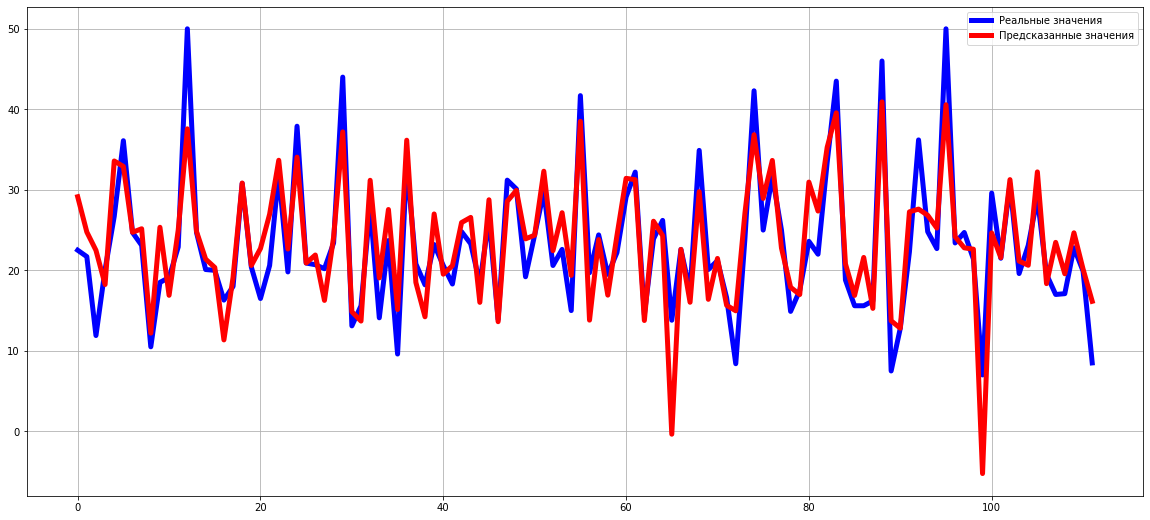

In [61]:
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "blue", linewidth=5, label = 'Реальные значения')
plt.plot(pred, "red", linewidth=5, label = 'Предсказанные значения')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [62]:
print('Mae LR',mean_absolute_error(y_test,pred))

Mae LR 3.2177364052920576


In [63]:
print('Ошибка MSE=',mean_squared_error(y_test,pred,squared=True))


Ошибка MSE= 18.11522086242395


In [66]:
tree_regressor = tree.DecisionTreeRegressor(max_depth=10)

In [67]:
tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [68]:
pred_tree = tree_regressor.predict(X_test)

In [69]:
frame = {'Важность параметров':tree_regressor.feature_importances_,'Параметры':X_train.columns}
result = pd.DataFrame(frame)

In [73]:
top=result.sort_values(by='Важность параметров', ascending=False)

In [71]:
print('Mae tree',mean_absolute_error(y_test,pred_tree))

Mae tree 2.9195979710065845


In [76]:
fig4 = px.bar(
    top,
    x='Важность параметров',
    y='Параметры',
    title='Важность параметров',
)
fig4.show() 